In [1]:
## 1.A)
import numpy as np
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
## 1.B) 
sns.set()

In [3]:
## 1.C) 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
## 1.C) Contd. 
data_raw = pd.read_csv(r"/content/drive/MyDrive/NFLRush.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
## 1.D) 
data_raw.head()
##display(data_raw)
##data_raw

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [7]:
## 1.E) 
data_raw.shape

(509762, 49)

In [8]:
## 1.F) 
data_raw.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [9]:
## 2.A) 
data_raw.Yards
##data_raw.GameId
##data_raw.Yards
##data_raw.JerseyNumber
##data_raw.HomeTeamAbbr
##data_raw.VisitorTeamAbbr
##data_raw.PlayerCollegeName
##data_raw.GameWeather


0          8
1          8
2          8
3          8
4          8
          ..
509757    11
509758    11
509759    11
509760    11
509761    11
Name: Yards, Length: 509762, dtype: int64

In [10]:
## 2.B) 
data_raw[data_raw["PlayId"] == 20181115001638].value_counts()
## len(data_raw[data_raw["PlayId"] == 20181115001638])  (=22)
## 22 rows found; 11 home, 11 away

## shared values for all 22 rows; play data
## similar attributes/columns found are shared assets such as: 
##    HomeTeamAbbr, VisitorTeamAbbr, Week, Stadium, Location
##    StadiumType, Turf, GameWeather, Temperature, Humidity
##    WindSpeed, WindDirection

## these are shared attributes that are common among the game- 
## teams, setting, weather, field, time, characteristics, etc

## unique rows; player data
## similar attributes/columns found are shared assets such as: 
##    DisplayName (Name), NflId, JerseyNumber, PlayerHeight, 
##    PlayerWeight, PlayerBirthDate, PlayerCollegeName, 
##    Position, Dir, X, Y, S, A, Dis, Dir, Orientation

## these are unique attributes tht are unique, such as player 
## data, age, name, etc; as well as individual/unique stats 
## that are player specific, like position, speed, 
## acceleration, distance, and direction

##data_raw.value_counts()

GameId      PlayId          Team  X      Y      S     A     Dis   Orientation  Dir     NflId    DisplayName               JerseyNumber  Season  YardLine  Quarter  GameClock  PossessionTeam  Down  Distance  FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher  OffenseFormation  OffensePersonnel  DefendersInTheBox  DefensePersonnel  PlayDirection  TimeHandoff               TimeSnap                  Yards  PlayerHeight  PlayerWeight  PlayerBirthDate  PlayerCollegeName    Position  HomeTeamAbbr  VisitorTeamAbbr  Week  Stadium            Location     StadiumType  Turf       GameWeather    Temperature  Humidity  WindSpeed  WindDirection
2018111500  20181115001638  away  87.90  21.75  2.97  2.58  0.31  245.08       247.96  2560907  Marquez Valdes-Scantling  83            2018    21        2        06:45:00   GB              1     10        GB             10                   14                      2558116      SINGLEBACK        1 RB, 1 TE, 3 WR  6.0                4 DL, 2 

In [11]:
## 2.C)
##data_raw[data_raw["DefendersInTheBox"] == 3.0].value_counts()

len(data_raw[data_raw["DefendersInTheBox"] == 3])
##print(pd.unique(data_raw["DefendersInTheBox" = 3.0]))  (BROKEN)
##data_raw[data_raw["DefendersInTheBox"] == 3.0].nunique() 



396

In [12]:
## 2.C) Contd
len(data_raw[data_raw["DefendersInTheBox"] == 3]["PlayId"].unique())
##.shape 
## set, print lenset of Id

18

In [13]:
## 2.C) Contd

## (not correct, wrong method) len(data_raw["PlayId"].unique()) / 509762 * 100

len(data_raw[data_raw["DefendersInTheBox"] == 3]["PlayId"].unique()) / len(data_raw["PlayId"].unique()) * 100

## we find that there are 396 unique occurences during which there are 3 
## defenders in the box. Once we apply unique playID, we find that the 
## number of unique playIDs with 3 deffenders in the box is 18. This   
## value makes sense, as the number of players per play is 22 (22*18=396)

## porportion of all plays that have 3 DefendersInTheBox (%)

## It does not seem to be common to have only 3 DefendersInTheBox- 
## Only approx ~0.0777% of plays have 3 DefendersInTheBox, which is a very small number 

0.07768331103534591

In [14]:
## 2.D) 

##michael_thomas = (df["Display_Name"] = Michael Thomas) 
##df.loc[michael_thomas]
len(data_raw[data_raw["DisplayName"] == 'Michael Thomas']["GameId"].unique())

## 50 unique games during which a player named "Michael Thomas" played

50

In [15]:
## 2.E) 
## 2 unique IDs found
data_raw[data_raw["DisplayName"] == "Michael Thomas"].value_counts('NflId')

NflId
2556370    621
2535687    226
dtype: int64

In [16]:
## 2.E) Contd

MT1 = data_raw.loc[data_raw['NflId'] == 2556370]
print(len(MT1.value_counts('GameId')))
MT2 = data_raw.loc[data_raw['NflId'] == 2535687]
print(len(MT2.value_counts('GameId')))

## there must be a duplicate/oerlap because there is 1 overlapping value 
##(50 games)
## for loop or other way
## unique vs value counts
## U: list like 
## VC: tables, extrapolate single text from there

32
19


In [17]:
## 2.E) Contd
## 2.F) New

data_raw[data_raw["DisplayName"] == "Michael Thomas"].groupby(["Season" , "NflId" , "GameId"])["PlayId"].count()
##data_raw[data_raw["DisplayName"] == "Michael Thomas"]
##.groupby(["NflId"]).value_count()

#2017: 2535687 (5) and 2556370 (16)
#2018: 2535687(14) and 2556370 (16)


Season  NflId    GameId    
2017    2535687  2017092408    13
                 2017100100     4
                 2017102600    28
                 2017110510    23
                 2017112604    13
        2556370  2017091100    19
                 2017091705    11
                 2017092402    18
                 2017100100    21
                 2017101504    25
                 2017102203    22
                 2017102904    17
                 2017110503    21
                 2017111200    28
                 2017111905    12
                 2017112607     8
                 2017120307    16
                 2017120700    10
                 2017121705    23
                 2017122405    16
                 2017123110    21
2018    2535687  2018090907     2
                 2018092303     8
                 2018100701     2
                 2018101100     1
                 2018102200     3
                 2018102806     2
                 2018111200    11
                 201

In [18]:
## 2.G) 
print(data_raw.groupby(['Season'])['Stadium'].value_counts())
## (does not work) data_raw[data_raw["Stadium"] == "Gillette"].groupby(["GameId"])["Season"].count()

Season  Stadium                      
2017    MetLife Stadium                  10054
        New Era Field                     9086
        Levis Stadium                     8932
        Lucas Oil Stadium                 8668
        Paul Brown Stadium                8558
                                         ...  
2018    M&T Stadium                       1078
        Lambeau field                     1012
        Los Angeles Memorial Coliesum     1012
        Broncos Stadium At Mile High       990
        Metlife Stadium                    836
Name: Stadium, Length: 88, dtype: int64


In [19]:
## 2.H) 
## How messy is the data?
## Wind direction: very messy...

print(data_raw["WindDirection"].unique())

['SW' 'NNE' 'SE' 'East' nan 'NE' 'North' 'S' 'Northwest' 'SouthWest' 'ENE'
 'ESE' 'SSW' 'NW' 'Northeast' 'From S' 'W' 'South' 'West-Southwest' 'E'
 '13' 'N' 'NNW' 'South Southeast' 'SSE' 'West' 'WSW' 'From SW' 'WNW' 's'
 'NorthEast' 'from W' 'W-NW' 'South Southwest' 'Southeast' 'From WSW'
 'West Northwest' 'Calm' 'From SSE' 'From W' 'East North East' 'From ESE'
 'EAST' 'East Southeast' 'From SSW' '8' 'North East' 'Southwest'
 'North/Northwest' 'From NNE' '1' 'N-NE' 'W-SW' 'From NNW']


In [20]:
## 2.H) Contd. (Experimentation)
print(data_raw["PlayDirection"].unique())
## Not messy, only L/R

['left' 'right']


In [21]:
## 2.H) Contd.
print(data_raw["Season"].unique())
## Not messy, only 2017 and 2018 

[2017 2018]


In [22]:
## 2.H) Contd.
print(data_raw["Position"].unique())
## Not messy, but seems to be missing some data: 
## https://www.rookieroad.com/football/positions/position-abbreviations/

['SS' 'DE' 'ILB' 'FS' 'CB' 'DT' 'WR' 'TE' 'T' 'QB' 'RB' 'G' 'C' 'OLB' 'NT'
 'FB' 'MLB' 'LB' 'OT' 'OG' 'HB' 'DB' 'S' 'DL' 'SAF']


In [23]:
## 2.H) Contd.
print(data_raw["Turf"].unique())

['Field Turf' 'A-Turf Titan' 'Grass' 'UBU Sports Speed S5-M' 'Artificial'
 'DD GrassMaster' 'Natural Grass' 'UBU Speed Series-S5-M' 'FieldTurf'
 'FieldTurf 360' 'Natural grass' 'grass' 'Natural' 'Artifical'
 'FieldTurf360' 'Naturall Grass' 'Field turf' 'SISGrass'
 'Twenty-Four/Seven Turf' 'natural grass']


In [24]:
## 2.H) Contd.
print(data_raw["GameWeather"].unique())
## Very messy, imprecise/vague 

['Clear and warm' 'Sun & clouds' 'Sunny' 'Controlled Climate'
 'Mostly Sunny' 'Clear' nan 'Indoor' 'Mostly Cloudy' 'Mostly Coudy'
 'Partly sunny' 'Partly Cloudy' 'Cloudy' 'Sunny, highs to upper 80s'
 'Indoors' 'Light Rain' 'Showers' 'Partly cloudy' 'Partly Sunny'
 '30% Chance of Rain'
 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'
 'Rain' 'Cloudy, fog started developing in 2nd quarter' 'Coudy'
 'Rain likely, temps in low 40s.' 'Cold' 'N/A (Indoors)' 'Clear skies'
 'cloudy' 'Fair' 'Mostly cloudy' 'Cloudy, chance of rain'
 'Heavy lake effect snow' 'Party Cloudy'
 'Cloudy, light snow accumulating 1-3"' 'Cloudy and cold' 'Snow' 'Hazy'
 'Scattered Showers' 'Cloudy and Cool' 'N/A Indoor' 'Rain Chance 40%'
 'Clear and sunny' 'Mostly sunny' 'Sunny and warm' 'Partly clear'
 'Cloudy, 50% change of rain' 'Clear and Sunny' 'Sunny, Windy'
 'Clear and Cool' 'Sunny and clear' 'Mostly Sunny Skies' 'Partly Clouidy'
 'Clear Skies' 'Sunny Skies' 'Overcast' 'T: 51; H: 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


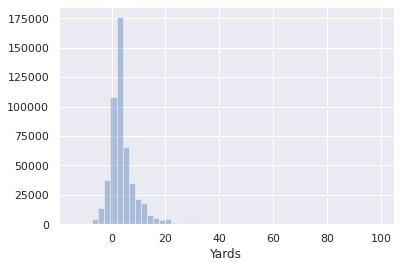

In [25]:
## 3.A) 
sns.distplot(data_raw['Yards'], kde=False)
## kde false/true 

## The distribution of values is quite skewed, a large proportion of 
## values are between 0 and 10

## There are more values with negative yard runs than I imagined  
## (x<0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


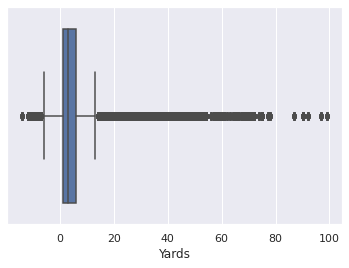

In [26]:
## 3.B) 
sns.boxplot(data_raw['Yards'])

## the groups of similarly numbered/unique values tend to be grouped 
## together. The boxplot adds representation for the outliers, which may 
## not necessarily be seen as well in the standard distplot. While the 
## boxplot does not seem to be immediately misleading, it may overrepresent 
## the most popular figures (the more normal datapoints). 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


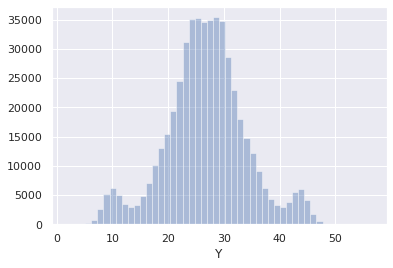

In [27]:
## 3.C)
sns.distplot(data_raw['Y'], kde=False)
## this represents the distribution of y (short axis) player positions 
## across the field. The players tend to be more closely grouped together 
## at the center of the field, and as such, there appears a large 
## majority of the players at the center (~20-30) of the plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


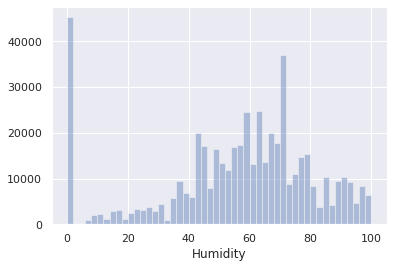

In [28]:
## 3.C) Contd.  (Experimentation)
sns.distplot(data_raw['Humidity'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


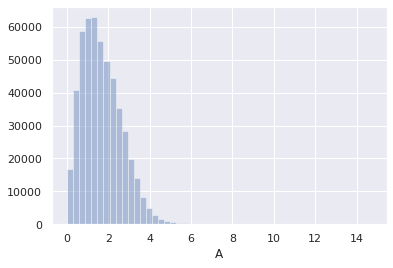

In [29]:
## 3.C) Contd. (Experimentation)
sns.distplot(data_raw['A'], kde=False)

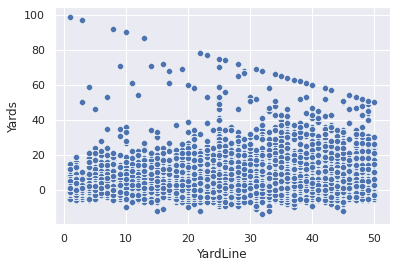

In [30]:
## 3.D) 
sns.scatterplot(data=data_raw, x="YardLine", y="Yards")

## X+Y=100 because there are only 100Yds on a given field

## X is Yard line (where players are located) and Y is the yards ran 
## So, X (Yds) + Y (Yds ran) = 100 for the uppermost values

## Those given points along that diagonal line therefore represent 
## touchdowns, which complete 100Yds

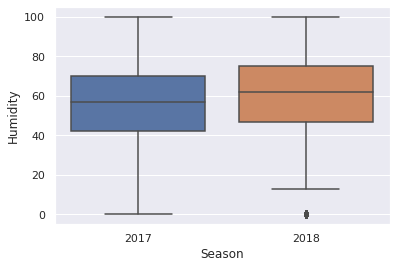

In [31]:
## 3.E) 
sns.boxplot(data=data_raw, x="Season", y="Humidity")

# we can gather that the values occured between 40 and 80 for each season,
# while the average tends to increase slightly in 2018 as opposed to 2017 

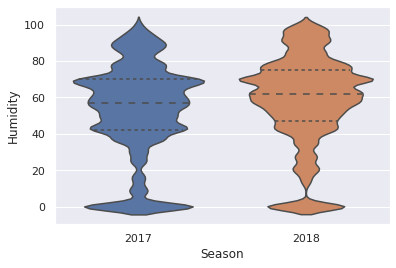

In [32]:
## 3.F) 
##sns.set_context("paper")
##sns.set_style("white")
sns.violinplot(data=data_raw, x="Season", y="Humidity", inner="quartile")

## The true values and weights are more visible in the violin plot 
## presented here as opposed to the boxplot above. The specific amounts 
## and quantities of each are much more evident, and can be more 
## accurately portrayed. 

In [33]:
## 3.G) Experimentation
print(data_raw["OffenseFormation"].unique())

['SHOTGUN' 'SINGLEBACK' 'JUMBO' 'PISTOL' 'I_FORM' 'ACE' 'WILDCAT' nan
 'EMPTY']


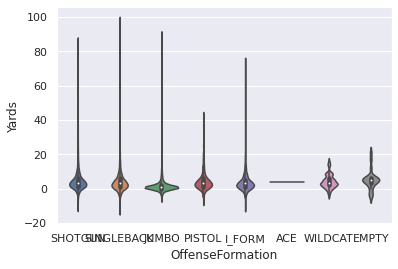

In [34]:
## 3.G) Contd.
sns.violinplot(data=data_raw, x="OffenseFormation", y="Yards")

In [35]:
## 3.G Contd. 
print(data_raw["PlayerWeight"].unique())
##(Not *too* many unique values)

[212 288 270 245 206 252 190 193 208 197 308 185 265 335 325 225 210 183
 205 310 300 301 254 315 237 307 255 260 213 320 230 321 305 248 216 215
 195 350 202 250 242 176 238 199 192 203 275 302 232 207 246 345 316 200
 259 234 330 204 218 209 324 295 194 191 251 331 267 303 184 217 311 220
 309 167 314 258 235 239 352 188 240 268 296 253 280 346 186 227 211 313
 224 233 272 294 257 336 241 198 319 285 266 196 261 340 328 221 312 201
 304 219 187 179 290 332 222 293 160 262 223 326 327 236 228 347 318 244
 264 249 263 322 269 214 226 278 247 279 177 229 317 341 299 287 178 256
 298 231 180 297 306 274 292 182 243 291 380 174 329 273 168 175 286 281
 338 169 323 173 334 277 342 271 284 189 159 170 289 358 351 153 181 282
 283 339]


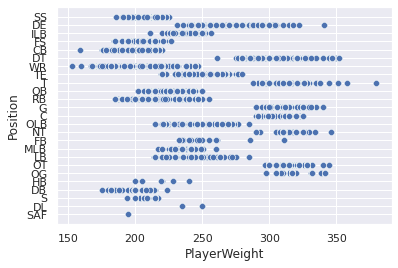

In [36]:
## 3.G Contd. 
sns.scatterplot(data=data_raw, x="PlayerWeight", y="Position")

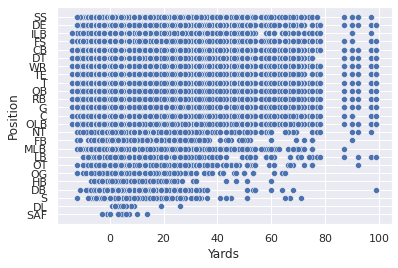

In [37]:
## 3.G Contd. 
sns.scatterplot(data=data_raw, x="Yards", y="Position")

## (or violinplot with same variables)
##sns.violinplot(data=data_raw, x="Yards", y="Position")

In [38]:
## 3.G Contd. 
print(data_raw["Week"].unique())
## (data is fine)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


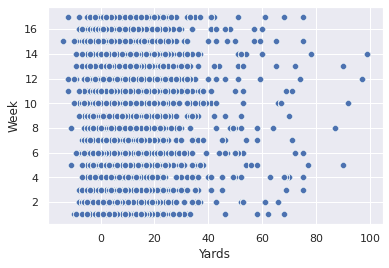

In [39]:
## 3.G Contd. 
sns.scatterplot(data=data_raw, x="Yards", y="Week")

## or scatterplot 
## sns.violinplot(data=data_raw, y="Yards", x="Week")

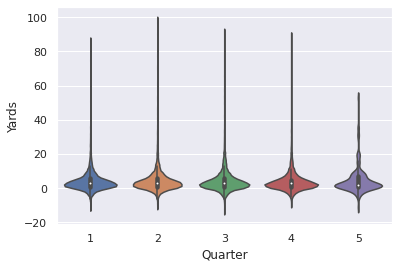

In [40]:
## 3.G Contd. 
sns.violinplot(data=data_raw, y="Yards", x="Quarter")

## (Relationship between Yds and Qtr?)

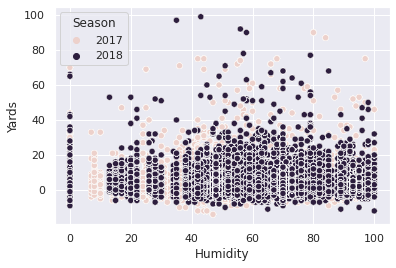

In [41]:
## 3.H) 
sns.scatterplot(data=data_raw, x="Humidity", y="Yards", hue="Season")

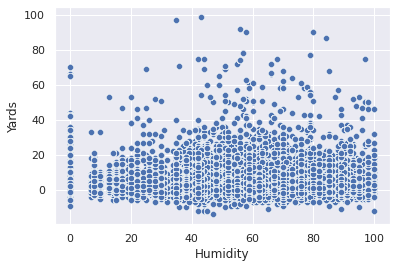

In [42]:
## 3.I) 
sns.scatterplot(data=data_raw, x="Humidity", y="Yards")


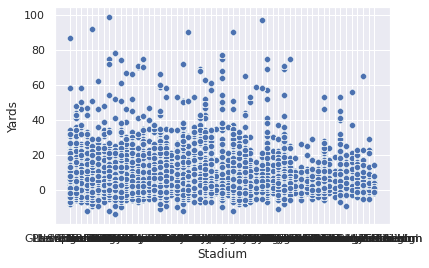

In [43]:
## 3.I Contd
sns.scatterplot(data=data_raw, x="Stadium", y="Yards")

In [44]:
## 3.I Contd. 
## There seems to be a noteable relationship between both Humidity/Yds 
## and Stadium/Yds. While there is some confounding and mess in the data 
## displayed, the optimal humidity for maximum yardage seems to be 
## between approx. 40 and 80% humidity. An interesting gap can be noted 
## between ~1% and ~6% to 7% humidity, which can be attributed to a gap 
## in the dataset.(?) 

## However, with regards to the stadium/Yds plot, there 
## doesn't seem to be a relationship between both variables, or any 
## useful extrapolated values for that matter. While some stadiums on the 
## right side of the graph appear to have a smaller distribution overall, 
## this may not necessarily be the case. 

## It does not seem useful in this scenario to include in the model overal

In [45]:
##3.J

def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12*2, 6.33*2)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

def plot_play(play_id, train_df=data_raw):
    def get_dx_dy(angle, dist):
        cartesianAngleRadians = (450-angle)*math.pi/180.0
        dx = dist * math.cos(cartesianAngleRadians)
        dy = dist * math.sin(cartesianAngleRadians)
        return dx, dy

    fig, ax = create_football_field()
    train_df.query("PlayId == @play_id and Team == 'away'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=50, legend='Away')
    train_df.query("PlayId == @play_id and Team == 'home'") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=50, legend='Home')
    train_df.query("PlayId == @play_id and NflIdRusher == NflId") \
        .plot(x='X', y='Y', kind='scatter', ax=ax, color='red', s=100, legend='Rusher')
    rusher_row = train_df.query("PlayId == @play_id and NflIdRusher == NflId")
    yards_covered = rusher_row["Yards"].values[0]

    x = rusher_row["X"].values[0]
    y = rusher_row["Y"].values[0]
    rusher_dir = rusher_row["Dir"].values[0]
    rusher_orientation = rusher_row["Orientation"].values[0]
    rusher_speed = rusher_row["S"].values[0]
    dx, dy = get_dx_dy(rusher_dir, rusher_speed)
    dx_o, dy_o = get_dx_dy(rusher_orientation, rusher_speed/2)

    ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.3)
    ax.arrow(x, y, dx_o, dy_o, length_includes_head=True, width=0.3, color="yellow")
    plt.title(f'Play # {play_id} and yard gain is {yards_covered}', fontsize=20)
    plt.show()

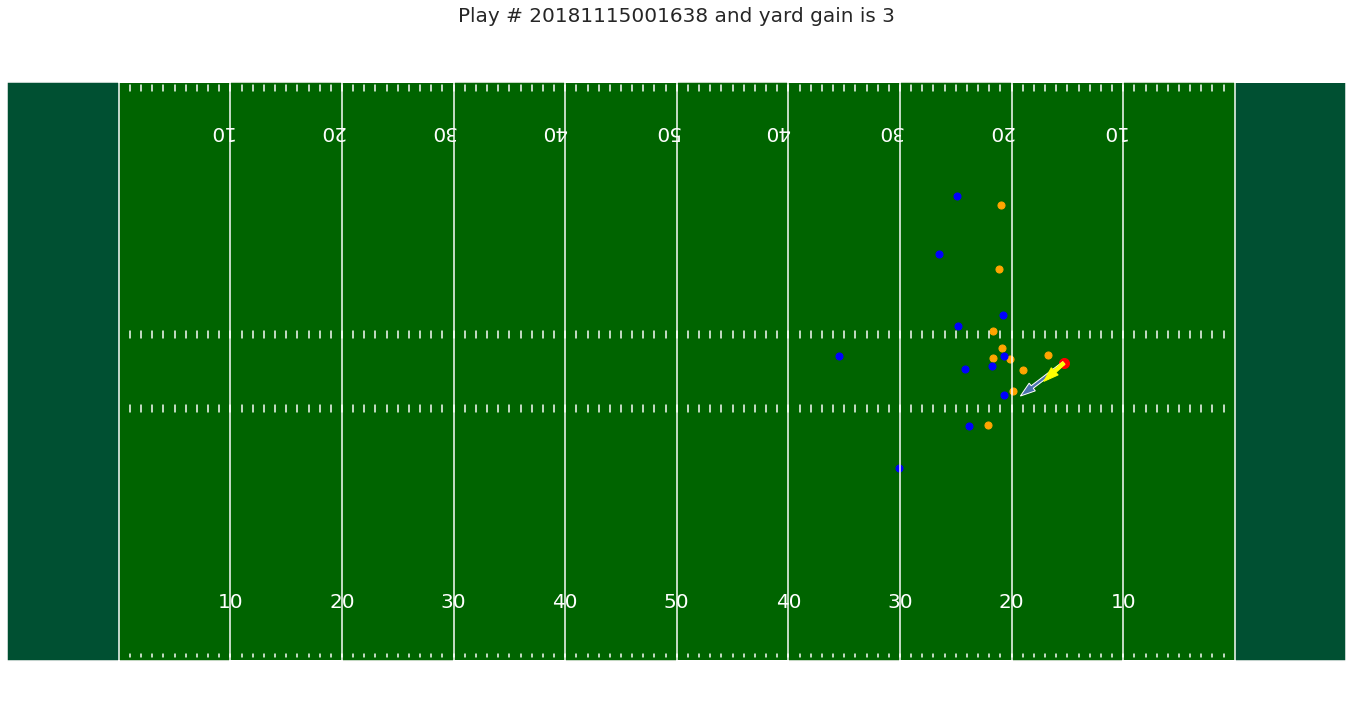

In [46]:
## 3.H // (3.K actual)
## one calls the other 

## plot_play(play_id=20170907000118, train_df=data_raw)
plot_play(play_id=20181115001638, train_df=data_raw)

In [47]:
print("Crap In, Crap Out")

Crap In, Crap Out


In [48]:
# /end/ #